In [164]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math

### Binary class Classification 

In [165]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exloratory data analysis(EDA) 

# Univariate analyis

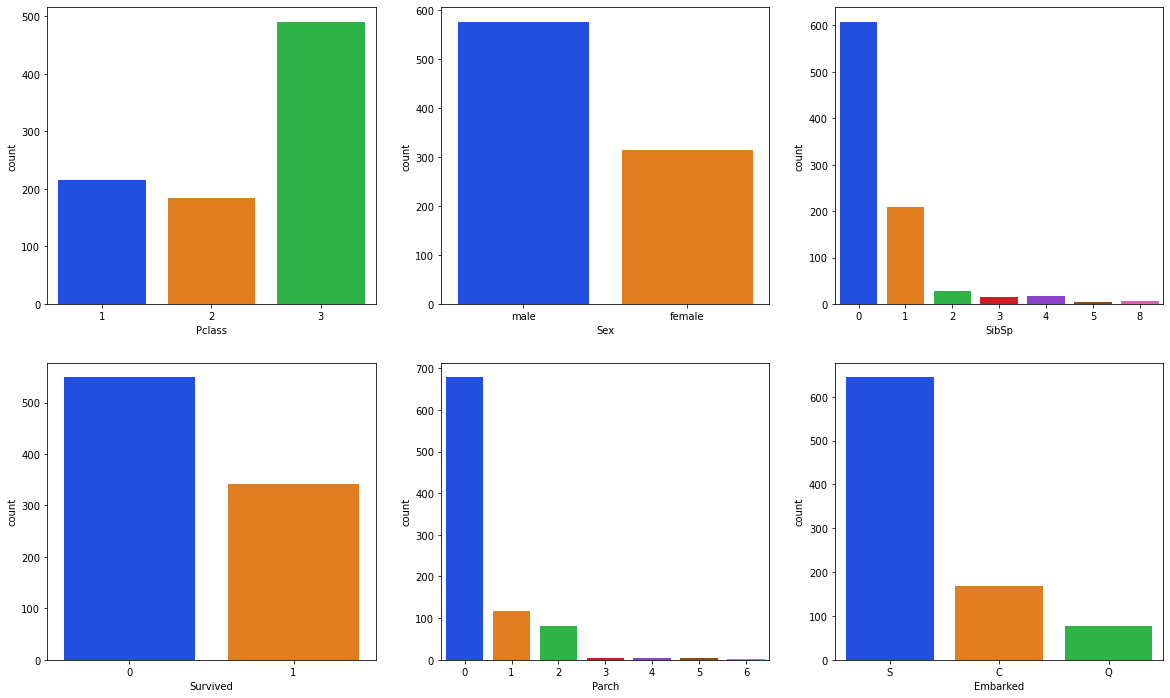

In [84]:
cols = ['Pclass', 'Sex', 'SibSp','Survived',
       'Parch', 'Embarked']

fig,ax = plt.subplots(math.ceil(len(cols)/3),3,figsize=(20, 12))
ax = ax.flatten()
for a,s in zip(ax,cols):
    sns.countplot(x =s,data = train,palette = "bright",ax =a)

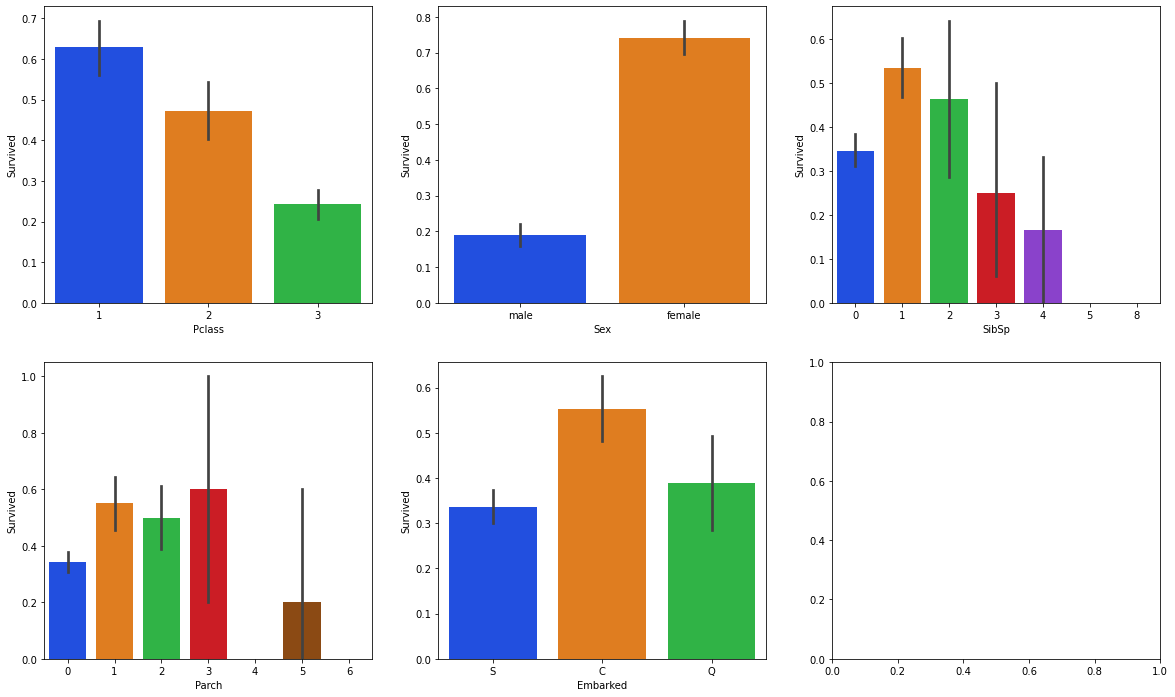

In [85]:
#bar graph
cols = ['Pclass', 'Sex', 'SibSp',
       'Parch', 'Embarked']
fid, ax = plt.subplots(math.ceil(len(cols)/3),3, figsize=(20,12))
ax = ax.flatten()
for a, c in zip(ax,cols):
    sns.barplot(x=c,y='Survived',data=train,palette='bright',ax=a)


# Bivariate analysis

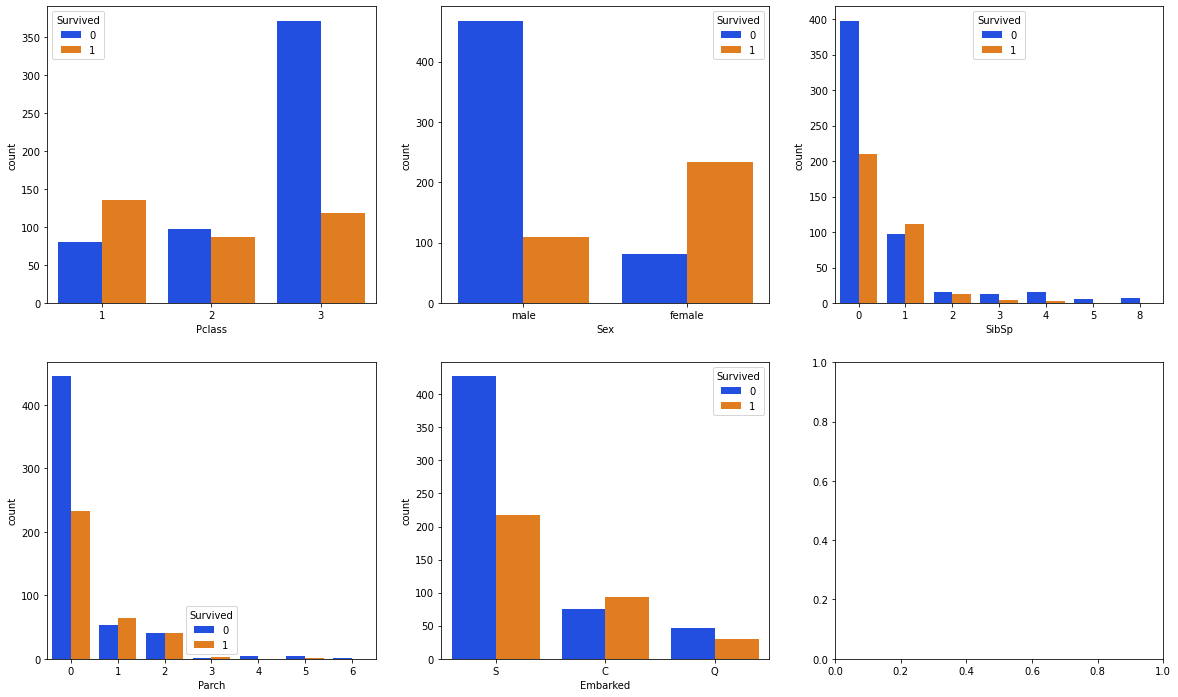

In [86]:
cols = ['Pclass', 'Sex', 'SibSp',
       'Parch', 'Embarked']

fig,ax = plt.subplots(math.ceil(len(cols)/3),3,figsize=(20, 12))
ax = ax.flatten()
for a,s in zip(ax,cols):
    sns.countplot(x =s,hue='Survived',data = train,palette = "bright",ax =a)

# Find the correlation

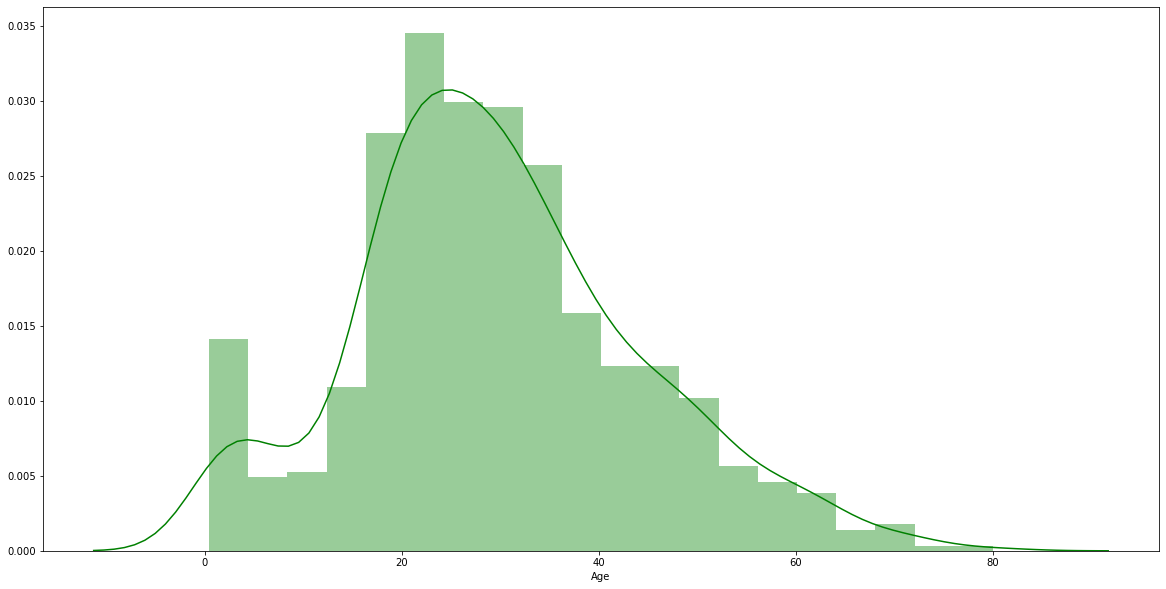

In [87]:
age = pd.Series(train['Age'])
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(age,color='g',ax=ax)

In [88]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


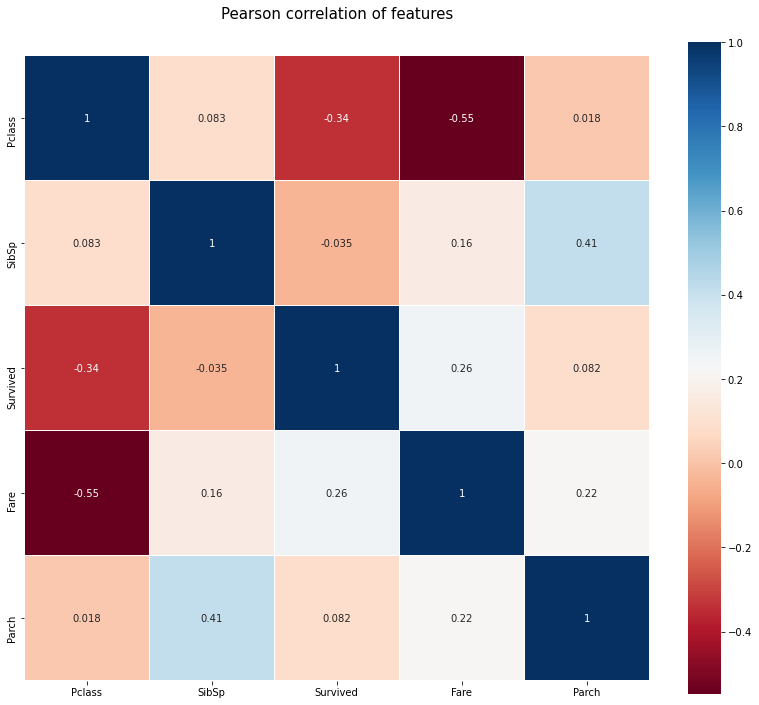

In [135]:
cols = ['Pclass', 'SibSp','Survived','Fare',
       'Parch']
colormap = plt.cm.RdBu
plt.figure(figsize = (14,12))
plt.title('Pearson correlation of features',y=1.05,size=15)
sns.heatmap(train[cols].astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [136]:
#Fare and survived has direct correlation
#Parch and survived has direct correlation (positive correlation between them)


# Clean the data

In [166]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [167]:
print(train.info())
print('*'*60)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       -------------

 Age, cabin, embarked has missing values and cabin has low set of values and hence we can remove it
Now we need to treat missing values and hence we replace the age missing values with its mean and Embarked values with median

In [168]:
cols = ['Pclass', 'SibSp','Survived','Fare',
       'Parch']
for col in train.columns:
    print("No. of Na values in {} are {}".format(str(col),str(len(train[train[col].isnull()])) + '\n'))

No. of Na values in PassengerId are 0

No. of Na values in Survived are 0

No. of Na values in Pclass are 0

No. of Na values in Name are 0

No. of Na values in Sex are 0

No. of Na values in Age are 177

No. of Na values in SibSp are 0

No. of Na values in Parch are 0

No. of Na values in Ticket are 0

No. of Na values in Fare are 0

No. of Na values in Cabin are 687

No. of Na values in Embarked are 2



In [169]:
# Correcting age column:
imputed_age = float(train['Age'].dropna().median())
imputed_embarked = train['Embarked'].dropna().mode()[0]
print("imputed_age : ",imputed_age)
print("imputed_embarked : ",imputed_embarked)

imputed_age :  28.0
imputed_embarked :  S


In [170]:
#Updating new values in dataframe:
combine = [train, test]
for data in combine:
    data['Age'] = data['Age'].fillna(imputed_age)
    data['Embarked']  =data['Embarked'].fillna(imputed_embarked)


In [171]:
train.describe(include=['O'])
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Hee, Mr. Ling",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [172]:
#check for na values again
train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [173]:
#modify the data into mnumerical one:
for data in combine:
    data['Sex'] =data['Sex'].map({'male':0,'female':1}).astype(int)

In [174]:
#create age group
for data in combine:
    data.loc[(data['Age']<=16), 'Age'] =0
    data.loc[(data['Age']>16) & (data['Age']<=32),'Age']=1
    data.loc[(data['Age']>32) & (data['Age']<=48),'Age']=2
    data.loc[(data['Age']>48) & (data['Age']<=64),'Age']=3
    data.loc[(data['Age']>64),'Age'] = 4
    data['Age'] = data['Age'].astype(int)

In [175]:
train = train.drop(['Ticket', 'Cabin','Name'], axis=1)
test = test.drop(['Ticket', 'Cabin','Name'], axis=1)

In [176]:
test['Fare'].fillna(test['Fare'].dropna().mean(),inplace=True)

In [177]:
train['Fareband']= pd.qcut(train['Fare'],5)
train[['Fareband', 'Survived']].groupby('Fareband',as_index=False).mean().sort_values(by='Fareband',ascending=True)

,Fareband,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [178]:
combine= [train,test]

In [179]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <=  21.679), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <=  39.688), 'Fare']   = 3
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)
    


In [180]:
train = train.drop('Fareband',axis=1)

In [181]:
combine = [train,test]

In [182]:
for data in combine:
    data['Embarked'] = data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)


In [183]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,1,0,0,0
1,2,1,1,1,2,1,0,4,1
2,3,1,3,1,1,0,0,1,0
3,4,1,1,1,2,1,0,4,0
4,5,0,3,0,2,0,0,1,0


In [184]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,1.290685,0.523008,0.381594,2.004489,0.361392
std,257.353842,0.486592,0.836071,0.477990,0.812620,1.102743,0.806057,1.400635,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,3.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,4.000000,8.000000,6.000000,4.000000,2.000000


In [185]:
train['Fare'].unique()

array([0, 4, 1, 2, 3])

In [186]:
#train test data
train_df = train
test_df = test
Y_train = train_df["Survived"]
X_train = train_df.drop(["Survived","PassengerId"], axis=1)
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [190]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,1,0,0,0
1,1,1,2,1,0,4,1
2,3,1,1,0,0,1,0
3,1,1,2,1,0,4,0
4,3,0,2,0,0,1,0


# Model selection

In [191]:
#KNN cross validation
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.07

In [209]:
# grid search SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
clf  =SVC(kernel = 'rbf')
grid = {'gamma':[0.001, 0.01, 0.05, 0.1, 1, 10, 100],'C':[0.001, 0.01, 0.05, 0.1, 1, 10, 100]}
#default metric
grid_clf = GridSearchCV(clf, param_grid =grid)
grid_clf.fit(X_train, Y_train)
y_decision_score  = grid_clf.decision_function(X_test)

print('Grid best parameter (max. accuracy): ', grid_clf.best_params_)
print('Grid best score (accuracy): ', grid_clf.best_score_)


Grid best parameter (max. accuracy):  {'C': 10, 'gamma': 0.05}
Grid best score (accuracy):  0.8215366267026551


In [217]:
#SVC after grid search
from sklearn.svm import SVC

svc  =SVC(kernel = 'rbf',gamma=0.05,C=10)
svc.fit(X_train, Y_train)
Y_pred2 = svc.predict(X_test)
print("Score of SVC model is {}".format(round(svc.score(X_train,Y_train)*100,2)))

Score of SVC model is 83.16


In [218]:
#random forest classifier / enhanced
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 150,max_features=7,max_depth =5)
rf.fit(X_train, Y_train)
Y_pred3 = rf.predict(X_test)
print("Score of random forest model is {}".format(round(rf.score(X_train,Y_train)*100,2)))

Score of random forest model is 84.06


In [219]:
# gradient boosted DT / Bad model
from sklearn.ensemble import GradientBoostingClassifier

gcf = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,random_state=0)
gcf.fit(X_train,Y_train)
Y_pred4 = gcf.predict(X_test)
print("Score of gradient boosted classifier model is {}".format(round(gcf.score(X_train,Y_train)*100,2)))


Score of gradient boosted classifier model is 87.54


In [221]:
#output submission
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': Y_pred2})
output.to_csv('my_submission.csv', index=False)


print("Your submission was successfully saved!")

Your submission was successfully saved!
